#### Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import math
import os
import sys

In [2]:
# get the updated custom functions automatically
%load_ext autoreload
%autoreload 2

nb_dir = os.path.split(os.getcwd())[0]
nb_dir
print(nb_dir)

if nb_dir not in sys.path:
    print("Nb dir is not in system path")
    sys.path.append(nb_dir)
else:
    print("Nb dir is already in system path")

c:\Coding\quant\pyquant-research
Nb dir is not in system path


#### Formula
The RSI uses a two-part calculation that starts with the following formula.

The average gain or loss used in this calculation is the average percentage gain or loss during a look-back period. The formula uses a positive value for the average loss. Periods with price losses are counted as zero in the calculations of average gain. Periods with price increases are counted as zero in the calculations of average loss.

The standard number of periods used to calculate the initial RSI value is 14.

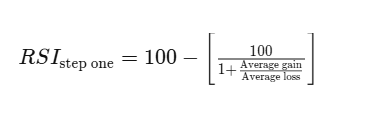

Once there are 14 periods of data available, the second calculation can be done. Its purpose is to smooth the results so that the RSI only nears 100 or zero in a strongly trending market

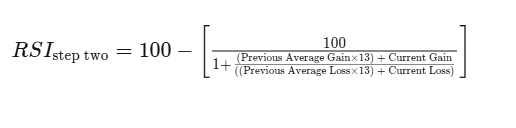

#### Get Data Series

In [3]:
# get spy etf data
SYMBOL = "AAPL"

data = yf.Ticker(SYMBOL)
data = data.history(auto_adjust=False, period="3mo")
data = data.sort_index(ascending=True)
data

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2025-02-28 00:00:00-05:00,236.949997,242.089996,230.199997,241.839996,241.523270,56833400,0.0,0.0
2025-03-03 00:00:00-05:00,241.789993,244.029999,236.110001,238.029999,237.718262,47184000,0.0,0.0
2025-03-04 00:00:00-05:00,237.710007,240.070007,234.679993,235.929993,235.621017,53798100,0.0,0.0
2025-03-05 00:00:00-05:00,235.419998,236.550003,229.229996,235.740005,235.431274,47227600,0.0,0.0
2025-03-06 00:00:00-05:00,234.440002,237.860001,233.160004,235.330002,235.021805,45170400,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-05-21 00:00:00-04:00,205.169998,207.039993,200.710007,202.089996,202.089996,59211800,0.0,0.0
2025-05-22 00:00:00-04:00,200.710007,202.750000,199.699997,201.360001,201.360001,46742400,0.0,0.0
2025-05-23 00:00:00-04:00,193.669998,197.699997,193.460007,195.270004,195.270004,78432900,0.0,0.0


#### Calculate RSI

In [4]:
from utils.indicators import calculate_rsi_ema

rsi_values = calculate_rsi_ema(data)
rsi_values

Date
2025-02-28 00:00:00-05:00          NaN
2025-03-03 00:00:00-05:00          NaN
2025-03-04 00:00:00-05:00          NaN
2025-03-05 00:00:00-05:00          NaN
2025-03-06 00:00:00-05:00          NaN
                               ...    
2025-05-21 00:00:00-04:00    44.837860
2025-05-22 00:00:00-04:00    44.111761
2025-05-23 00:00:00-04:00    38.509085
2025-05-27 00:00:00-04:00    44.650261
2025-05-28 00:00:00-04:00    44.902164
Name: Close, Length: 62, dtype: float64

In [5]:
import ta

# Calculate RSI and store it in a new column
rsi_ta = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()
rsi_ta

Date
2025-02-28 00:00:00-05:00          NaN
2025-03-03 00:00:00-05:00          NaN
2025-03-04 00:00:00-05:00          NaN
2025-03-05 00:00:00-05:00          NaN
2025-03-06 00:00:00-05:00          NaN
                               ...    
2025-05-21 00:00:00-04:00    44.837860
2025-05-22 00:00:00-04:00    44.111761
2025-05-23 00:00:00-04:00    38.509085
2025-05-27 00:00:00-04:00    44.650261
2025-05-28 00:00:00-04:00    44.902164
Name: rsi, Length: 62, dtype: float64

#### Plotting RSI

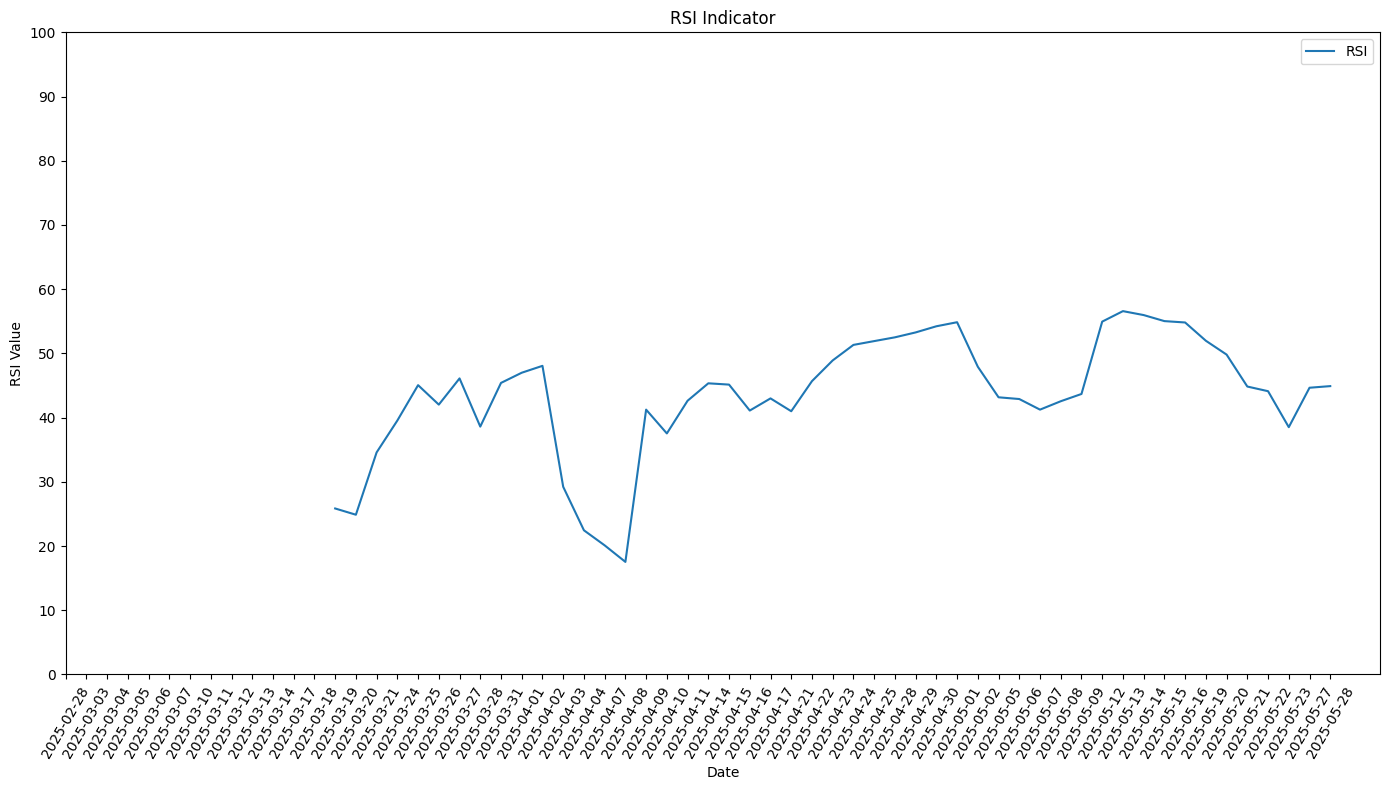

In [6]:
from utils.visualize import plot_RSI

plot_RSI(data=data,
         rsi_values=rsi_values)

### Backtest

In [110]:
from classes.Account import Account
from classes.Strategies import RSI_Strategy
from classes.Trade import Trade, Exit, StopLossExit

# $10000
account_v0 = Account(balance=10000)
signal = RSI_Strategy.signal(data)
signal.position_type, data.loc[signal.index], f"RSI VALUE : {signal.rsi_value}"

('long',
 Open            2.142200e+02
 High            2.187600e+02
 Low             2.137500e+02
 Close           2.152400e+02
 Adj Close       2.149581e+02
 Volume          5.438540e+07
 Dividends       0.000000e+00
 Stock Splits    0.000000e+00
 Name: 2025-03-19 00:00:00-04:00, dtype: float64,
 'RSI VALUE : 25.846648495201137')

In [111]:
from utils.helpers import position_sizing_calculator

tomorrow_index = data.index.get_loc(signal.index) + 1

position_result = position_sizing_calculator(stock_price=data["Open"].iloc[tomorrow_index],
                                           risk_percentage=0.02,
                                           value=account_v0.balance,
                                           sl=0.05,
                                           tp=0.1,
                                           position_type=signal.position_type)
print(position_result)

RR : 2.0
Reward : 21.39900054931641
Risk : 10.699500274658204
Position Size : 19
Stop Loss : 203.29050521850587
Exit : 235.38900604248047


In [112]:
stop_loss = StopLossExit(stop_price=position_result.stop_loss)
exit = Exit(exit_price=position_result.exit)

trade = Trade(symbol=SYMBOL,
              entry_time=data.index[tomorrow_index],
              entry_price=data["Open"].iloc[tomorrow_index],
              account=account_v0,
              position_type=signal.position_type,
              shares=position_result.position_size,
              stop_loss=stop_loss,
              exit=exit) if signal.position_type is not None else None

In [113]:
account_v0.portfolio.active_trades

In [114]:
signal.position_type

'long'

In [115]:
RSI_Strategy.execute_strategy(data=data,
                              account=account_v0,
                              index=tomorrow_index,
                              trade=trade,
                              position_type=signal.position_type)

INDEX :  14
INDEX :  15
INDEX :  16
INDEX :  17
INDEX :  18
INDEX :  19
INDEX :  20
INDEX :  21
INDEX :  22
INDEX :  23
INDEX :  24


In [118]:
print(trade)

Trade(75f0c479-052a-4578-aa9a-d45bf8a1e5d4): AAPL
Position: long | Shares: 19
Entry: 213.99 at 2025-03-20 00:00:00
Exit: 2025-04-03 00:00:00
PnL: -242.06 (-5.95%)


In [119]:
account_v0.balance

10000